In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# base 200 and test 200 dataset



#completed but this is blunder model


In [2]:
data = pd.read_csv('../../datasrc/nepseready.csv')

In [3]:
data

,SN,open,high,low,close,change,pct_change,turnover,date
0,1,173.26,173.26,173.26,173.26,0.00,0.00,0,20/07/1997
1,2,173.25,173.25,173.25,173.25,0.00,0.00,0,21/07/1997
2,3,173.03,173.03,173.03,173.03,0.00,0.00,0,22/07/1997
3,4,172.68,173.03,173.03,173.03,0.00,0.00,0,23/07/1997
4,5,172.66,172.66,172.66,172.66,0.00,0.00,0,24/07/1997
...,...,...,...,...,...,...,...,...,...
6083,6084,"2,148.16","2,154.19","2,103.46","2,109.10",-32.77,-1.53,"6,274,324,811.90",21/12/2023
6084,6085,"2,113.68","2,131.63","2,083.58","2,088.07",-21.03,-0.99,"7,111,733,829.80",24/12/2023
6085,6086,"2,089.88","2,107.74","2,055.63","2,070.84",-17.23,-0.82,"5,248,782,611.36",27/12/2023
6086,6087,"2,072.08","2,084.90","2,059.65","2,068.90",-1.93,-0.09,"4,290,932,297.59",28/12/2023


In [4]:
data.drop(columns = ['date','SN','high','low','open','change','pct_change','turnover'], inplace=True)

In [5]:
data

,close
0,173.26
1,173.25
2,173.03
3,173.03
4,172.66
...,...
6083,"2,109.10"
6084,"2,088.07"
6085,"2,070.84"
6086,"2,068.90"


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6088 entries, 0 to 6087
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   close   6088 non-null   object
dtypes: object(1)
memory usage: 47.7+ KB


In [7]:

# First, remove commas from the 'close' column.
data['close'] = data['close'].str.replace(',', '')

# Then, convert the 'close' column to numerical data (float).
data['close'] = pd.to_numeric(data['close'])

# Check the DataFrame's information to confirm the change.
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6088 entries, 0 to 6087
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   6088 non-null   float64
dtypes: float64(1)
memory usage: 47.7 KB


In [8]:
data

,close
0,173.26
1,173.25
2,173.03
3,173.03
4,172.66
...,...
6083,2109.10
6084,2088.07
6085,2070.84
6086,2068.90


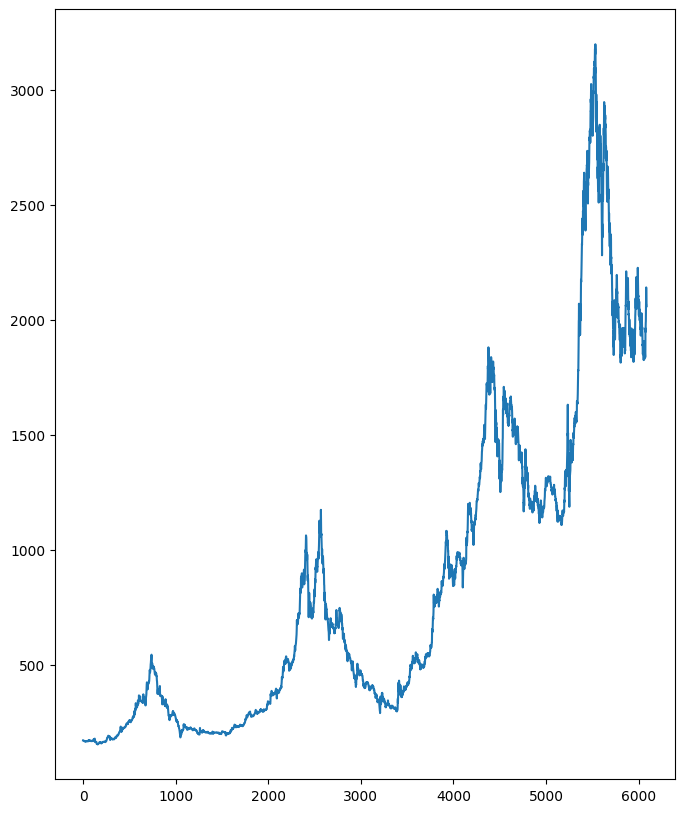

In [9]:
plt.figure(figsize=(8,10))
plt.plot(data)
plt.show()

In [10]:
train_data = data[:-200]
test_data = data[-200:]

In [11]:
train_data.shape

(5888, 1)

In [12]:
test_data.shape

(200, 1)

In [13]:
#scaling data

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler with a feature range from 0 to 1
scaler = MinMaxScaler(feature_range=(0, 1))

In [15]:
train_data_scale = scaler.fit_transform(train_data)

In [16]:
base_days = 200

In [17]:
x = []
y = []
for i in range(base_days, train_data_scale.shape[0]):
    x.append(train_data_scale[i-base_days:i])
    y.append(train_data_scale[i,0])

In [18]:
x, y = np.array(x), np.array(y)

In [19]:
x = np.reshape(x,(x.shape[0],x.shape[1],1))

In [20]:
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential

In [21]:
model = Sequential()
model.add(LSTM(50, activation = 'relu', return_sequences=True, input_shape=(x.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(60, activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(80, activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 200, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 200, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 200, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 200, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 200, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [23]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [24]:
model.fit(x, y, epochs = 50, verbose =1 )

Epoch 1/50

178/178 [==============================] - 89s 466ms/step - loss: 0.0092
Epoch 2/50
178/178 [==============================] - 72s 405ms/step - loss: 0.0029
Epoch 3/50
178/178 [==============================] - 77s 431ms/step - loss: 0.0025
Epoch 4/50
178/178 [==============================] - 74s 413ms/step - loss: 0.0022
Epoch 5/50
178/178 [==============================] - 77s 435ms/step - loss: 0.0027
Epoch 6/50
178/178 [==============================] - 76s 428ms/step - loss: 0.0020
Epoch 7/50
178/178 [==============================] - 83s 468ms/step - loss: 0.0019
Epoch 8/50
178/178 [==============================] - 77s 433ms/step - loss: 0.0018
Epoch 9/50
178/178 [==============================] - 88s 494ms/step - loss: 0.0016
Epoch 10/50
178/178 [==============================] - 89s 501ms/step - loss: 0.0016
Epoch 11/50
178/178 [==============================] - 93s 523ms/step - loss: 0.0018
Epoch 12/50
178/178 [==============================] - 89s 500ms/step - l

In [39]:
test_data



,close
0,1973.38
1,1972.29
2,1970.62
3,1977.30
4,1973.01
...,...
295,2109.10
296,2088.07
297,2070.84
298,2068.90


In [71]:
test_data = pd.concat((train_data.tail(20), test_data), ignore_index=True)

In [72]:
test_data

,close
0,2149.39
1,2182.11
2,2173.10
3,2178.81
4,2165.10
...,...
615,2109.10
616,2088.07
617,2070.84
618,2068.90


In [73]:
test_data_scale = scaler.transform(test_data)

In [74]:
x = []
y = [] 

for i in range(base_days, test_data_scale.shape[0]):
    x.append(test_data_scale[i-base_days:i])
    y.append(test_data_scale[i,0])

In [75]:
x, y = np.array(x), np.array(y)

In [76]:
x = np.reshape(x, (x.shape[0],x.shape[1],1))

In [77]:
pred = model.predict(x)

14/14 [==============================] - 2s 125ms/step


In [78]:
pred

array([[0.54050016],
       [0.54251575],
       [0.54304254],
       [0.5421124 ],
       [0.53970337],
       [0.53604054],
       [0.53140795],
       [0.5260578 ],
       [0.52077353],
       [0.5160379 ],
       [0.5121377 ],
       [0.50940293],
       [0.50793684],
       [0.50762296],
       [0.5082523 ],
       [0.5095669 ],
       [0.51113427],
       [0.5124769 ],
       [0.51307094],
       [0.5127069 ],
       [0.51138085],
       [0.5091342 ],
       [0.50616944],
       [0.5027925 ],
       [0.4993835 ],
       [0.4962108 ],
       [0.49335805],
       [0.49082074],
       [0.48859122],
       [0.48660952],
       [0.48476613],
       [0.48312956],
       [0.48204717],
       [0.48140153],
       [0.48093715],
       [0.4802577 ],
       [0.47894135],
       [0.47686115],
       [0.47404206],
       [0.47053492],
       [0.46660873],
       [0.46262297],
       [0.4589997 ],
       [0.45630482],
       [0.4547361 ],
       [0.4541876 ],
       [0.4544952 ],
       [0.455

In [79]:
pred = scaler.inverse_transform(pred)

In [80]:
pred

array([[1800.7233],
       [1806.8551],
       [1808.4576],
       [1805.628 ],
       [1798.2993],
       [1787.1564],
       [1773.0632],
       [1756.7871],
       [1740.7115],
       [1726.3049],
       [1714.44  ],
       [1706.1202],
       [1701.6602],
       [1700.7053],
       [1702.6199],
       [1706.619 ],
       [1711.3872],
       [1715.4718],
       [1717.2789],
       [1716.1714],
       [1712.1375],
       [1705.3026],
       [1696.2834],
       [1686.0101],
       [1675.6394],
       [1665.9875],
       [1657.3091],
       [1649.5901],
       [1642.8076],
       [1636.7788],
       [1631.1709],
       [1626.1921],
       [1622.8994],
       [1620.9353],
       [1619.5226],
       [1617.4554],
       [1613.451 ],
       [1607.1227],
       [1598.5465],
       [1587.8772],
       [1575.9331],
       [1563.8077],
       [1552.785 ],
       [1544.5868],
       [1539.8145],
       [1538.1459],
       [1539.0815],
       [1541.9951],
       [1545.9894],
       [1550.1775],


In [81]:
#future nepse price

In [82]:
m = y
z= []
future_days = 10
for i in range(base_days, len(m)+future_days):
    m = m.reshape(-1,1)
    inter = [m[-base_days:,0]]
    inter = np.array(inter)
    inter = np.reshape(inter, (inter.shape[0], inter.shape[1],1))
    pred = model.predict(inter)
    m = np.append(m ,pred)
    z = np.append(z, pred)

1/1 [==============================] - 0s 80ms/step


In [83]:
z = np.array(z)
z = scaler.inverse_transform(z.reshape(-1,1))

In [84]:
z

array([[1746.97030846],
       [1741.95225228],
       [1723.6884063 ],
       [1694.02667871],
       [1655.95298882],
       [1612.09513421],
       [1565.02098374],
       [1516.76339959],
       [1469.32070105],
       [1424.096816  ],
       [1381.9590337 ],
       [1343.24779645],
       [1307.78531268],
       [1275.17918975],
       [1244.93476636],
       [1216.52546755],
       [1189.09053185],
       [1162.1042003 ],
       [1135.23056377],
       [1108.28167634],
       [1081.2535488 ],
       [1054.25642827],
       [1027.34335301],
       [1000.46509262],
       [ 974.08820267],
       [ 948.42157239],
       [ 924.03139678],
       [ 901.19166163],
       [ 879.79257317],
       [ 859.80221776],
       [ 841.22567258],
       [ 823.7485158 ],
       [ 806.98791982],
       [ 790.40606738],
       [ 773.73976168],
       [ 757.35818543],
       [ 741.42997316],
       [ 726.54357783],
       [ 712.77393301],
       [ 700.16419463],
       [ 688.38924255],
       [ 677.287